In [2]:
# imports
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
teams = [
    'ANA', 'ARI', 'BOS', 'BUF', 'CAR', 'CBJ', 'CGY', 'CHI', 'COL', 'DAL', 'DET'
    , 'EDM', 'FLA', 'LAK', 'MIN', 'MTL', 'NSH', 'NJD', 'NYI', 'NYR', 'OTT', 
    'PHI', 'PIT', 'SEA', 'SJS', 'STL', 'TBL', 'TOR', 'VAN', 'VEG', 'WPG', 'WSH'
]

year = 2024

base_url = "https://www.hockey-reference.com/teams/{TEAM}/{YEAR}_games.html#games"

all_teams_data = []

# Loop through each team
for team in teams:
    print(f"Fetching data for {team}...")
    time.sleep(5)
    try:
        # Construct the URL for the team
        url = base_url.format(TEAM=team, YEAR=year)
        
        # Read the table from the page
        tables = pd.read_html(url)
        
        # Select the main schedule table
        schedule = tables[0]  # Adjust index if necessary
        
        # Add a column for the team
        schedule['Team'] = team
        
        # Append to the list
        all_teams_data.append(schedule)
    except Exception as e:
        print(f"Failed to fetch data for {team}: {e}")

# Combine all teams into one DataFrame
combined_data = pd.concat(all_teams_data, ignore_index=True)

# Save to a CSV file
combined_data.to_csv(f"nhl_{year}_season_data.csv", index=False)

print(f"All team data combined and saved as 'nhl_{year}_season_data.csv'.")

Fetching data for ANA...
Fetching data for ARI...
Fetching data for BOS...
Fetching data for BUF...
Fetching data for CAR...
Fetching data for CBJ...
Fetching data for CGY...
Fetching data for CHI...
Fetching data for COL...
Fetching data for DAL...
Fetching data for DET...
Fetching data for EDM...
Fetching data for FLA...
Fetching data for LAK...
Fetching data for MIN...
Fetching data for MTL...
Fetching data for NSH...
Fetching data for NJD...
Fetching data for NYI...
Fetching data for NYR...
Fetching data for OTT...
Fetching data for PHI...
Fetching data for PIT...
Fetching data for SEA...
Fetching data for SJS...
Fetching data for STL...
Fetching data for TBL...
Fetching data for TOR...
Fetching data for VAN...
Fetching data for VEG...
Fetching data for WPG...
Fetching data for WSH...
All team data combined and saved as 'nhl_2024_season_data.csv'.


In [5]:
nhl_2024 = pd.read_csv('nhl_2024_season_data.csv')

# no header columns here
nhl_2024[nhl_2024['GP'] == 'GP']

,GP,Date,Unnamed: 2,Opponent,GF,GA,Unnamed: 6,Unnamed: 7,W,L,OL,Streak,Att.,LOG,Notes,Team


In [6]:
nhl_2024.head(4)

,GP,Date,Unnamed: 2,Opponent,GF,GA,Unnamed: 6,Unnamed: 7,W,L,OL,Streak,Att.,LOG,Notes,Team
0,1,2023-10-14,@,Vegas Golden Knights,1,4,L,NaN,0,1,0,L 1,18033,2:35,NaN,ANA
1,2,2023-10-15,NaN,Carolina Hurricanes,6,3,W,NaN,1,1,0,W 1,17278,2:32,NaN,ANA
2,3,2023-10-19,NaN,Dallas Stars,2,3,L,NaN,1,2,0,L 1,14274,2:23,NaN,ANA
3,4,2023-10-21,@,Arizona Coyotes,1,2,L,NaN,1,3,0,L 2,4600,2:30,NaN,ANA


In [7]:
nhl_2024 = nhl_2024.rename(columns={'Unnamed: 2': 'Home/Away'})
nhl_2024 = nhl_2024.rename(columns={'Unnamed: 6': 'W/L'})

nhl_2024['Home/Away'] = nhl_2024['Home/Away'].apply(lambda x: 'Y' if pd.isna(x) else 'N' if x == '@' else x)

nhl_2024.head(3)

,GP,Date,Home/Away,Opponent,GF,GA,W/L,Unnamed: 7,W,L,OL,Streak,Att.,LOG,Notes,Team
0,1,2023-10-14,N,Vegas Golden Knights,1,4,L,NaN,0,1,0,L 1,18033,2:35,NaN,ANA
1,2,2023-10-15,Y,Carolina Hurricanes,6,3,W,NaN,1,1,0,W 1,17278,2:32,NaN,ANA
2,3,2023-10-19,Y,Dallas Stars,2,3,L,NaN,1,2,0,L 1,14274,2:23,NaN,ANA


In [ ]:
# save clean data to csv file
nhl_2024.to_csv("nhl2024.csv", index=False)

In [3]:
# read in data so we don't have to rerun above code again
nhl_2024 = pd.read_csv("nhl2024.csv")

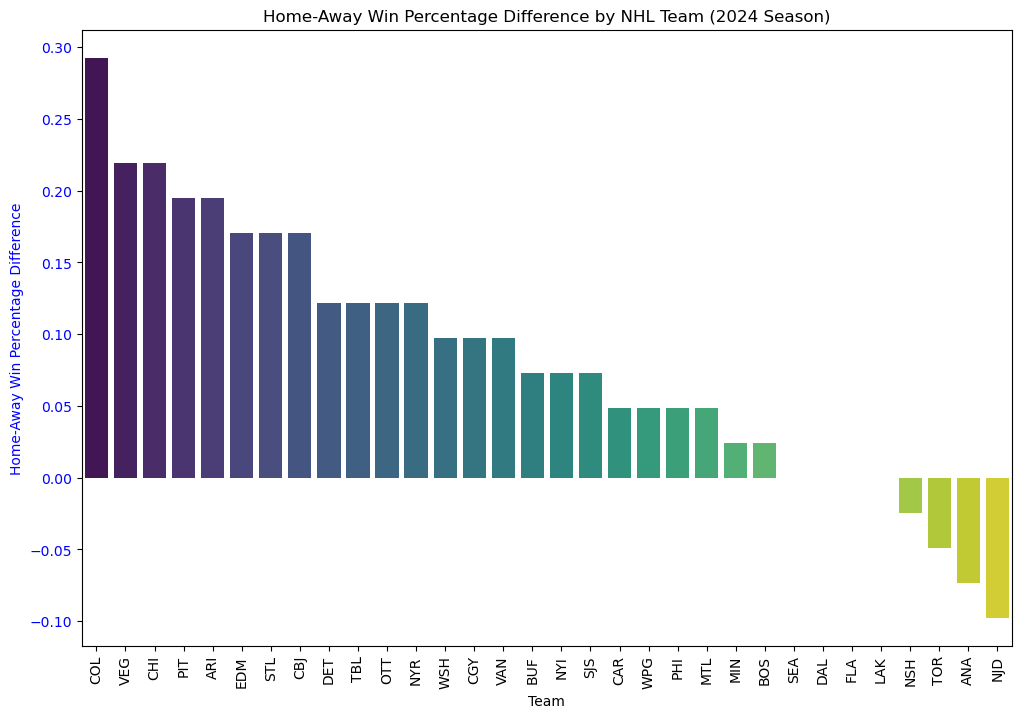

In [9]:
# Filter for home and away games
home_games = nhl_2024[nhl_2024['Home/Away'] == 'Y'].copy()
away_games = nhl_2024[nhl_2024['Home/Away'] == 'N'].copy()

# Group by team and calculate the home win percentage
home_win_percentage = home_games.groupby('Team')['W/L'].value_counts().unstack()
home_win_percentage['Win Percentage'] = (home_win_percentage['W']) / (home_win_percentage['W'] + home_win_percentage['L'])

# Group by team and calculate the away win percentage
away_win_percentage = away_games.groupby('Team')['W/L'].value_counts().unstack()
away_win_percentage['Win Percentage'] = (away_win_percentage['W']) / (away_win_percentage['W'] + away_win_percentage['L'])

# Calculate the difference between home and away win percentages
win_percentage_diff = home_win_percentage['Win Percentage'] - away_win_percentage['Win Percentage']

# Merge win percentage difference and average stadium fill into one DataFrame
team_stats = pd.DataFrame({
    'Win Percentage Diff': win_percentage_diff
})

# Sort the DataFrame by win percentage difference in descending order
team_stats = team_stats.sort_values(by='Win Percentage Diff', ascending=False)

# Create a subplot for both win percentage difference and average stadium fill
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the win percentage difference
sns.barplot(x=team_stats.index, y=team_stats['Win Percentage Diff'], palette='viridis', ax=ax1)
ax1.set_xlabel('Team')
ax1.set_ylabel('Home-Away Win Percentage Difference', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Suppress warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.title("Home-Away Win Percentage Difference by NHL Team (2024 Season)")
plt.show()

For some reason there are a few teams with no bar

Can do the same thing with the 2023 season

In [16]:
teams = [
    'ANA', 'ARI', 'BOS', 'BUF', 'CAR', 'CBJ', 'CGY', 'CHI', 'COL', 'DAL', 'DET'
    , 'EDM', 'FLA', 'LAK', 'MIN', 'MTL', 'NSH', 'NJD', 'NYI', 'NYR', 'OTT', 
    'PHI', 'PIT', 'SEA', 'SJS', 'STL', 'TBL', 'TOR', 'VAN', 'VEG', 'WPG', 'WSH'
]

year = 2023

base_url = "https://www.hockey-reference.com/teams/{TEAM}/{YEAR}_games.html#games"

all_teams_data = []

# Loop through each team
for team in teams:
    print(f"Fetching data for {team}...")
    time.sleep(5)
    try:
        # Construct the URL for the team
        url = base_url.format(TEAM=team, YEAR=year)
        
        # Read the table from the page
        tables = pd.read_html(url)
        
        # Select the main schedule table
        schedule = tables[0]  # Adjust index if necessary
        
        # Add a column for the team
        schedule['Team'] = team
        
        # Append to the list
        all_teams_data.append(schedule)
    except Exception as e:
        print(f"Failed to fetch data for {team}: {e}")

# Combine all teams into one DataFrame
combined_data = pd.concat(all_teams_data, ignore_index=True)

# Save to a CSV file
combined_data.to_csv(f"nhl_{year}_season_data.csv", index=False)

print(f"All team data combined and saved as 'nhl_{year}_season_data.csv'.")

Fetching data for ANA...
Fetching data for ARI...
Fetching data for BOS...
Fetching data for BUF...
Fetching data for CAR...
Fetching data for CBJ...
Fetching data for CGY...
Fetching data for CHI...
Fetching data for COL...
Fetching data for DAL...
Fetching data for DET...
Fetching data for EDM...
Fetching data for FLA...
Fetching data for LAK...
Fetching data for MIN...
Fetching data for MTL...
Fetching data for NSH...
Fetching data for NJD...
Fetching data for NYI...
Fetching data for NYR...
Fetching data for OTT...
Fetching data for PHI...
Fetching data for PIT...
Fetching data for SEA...
Fetching data for SJS...
Fetching data for STL...
Fetching data for TBL...
Fetching data for TOR...
Fetching data for VAN...
Fetching data for VEG...
Fetching data for WPG...
Fetching data for WSH...
All team data combined and saved as 'nhl_2023_season_data.csv'.


In [19]:
nhl_2023 = pd.read_csv('nhl_2023_season_data.csv')

nhl_2023[nhl_2023['GP'] == 'GP']

nhl_2023 = nhl_2023.rename(columns={'Unnamed: 2': 'Home/Away'})
nhl_2023 = nhl_2023.rename(columns={'Unnamed: 6': 'W/L'})

nhl_2023['Home/Away'] = nhl_2023['Home/Away'].apply(lambda x: 'Y' if pd.isna(x) else 'N' if x == '@' else x)

In [ ]:
# save clean data to csv file
nhl_2023.to_csv("nhl2023.csv", index=False)

In [5]:
# read in data so we don't have to rerun above code again
nhl_2023 = pd.read_csv("nhl2023.csv")

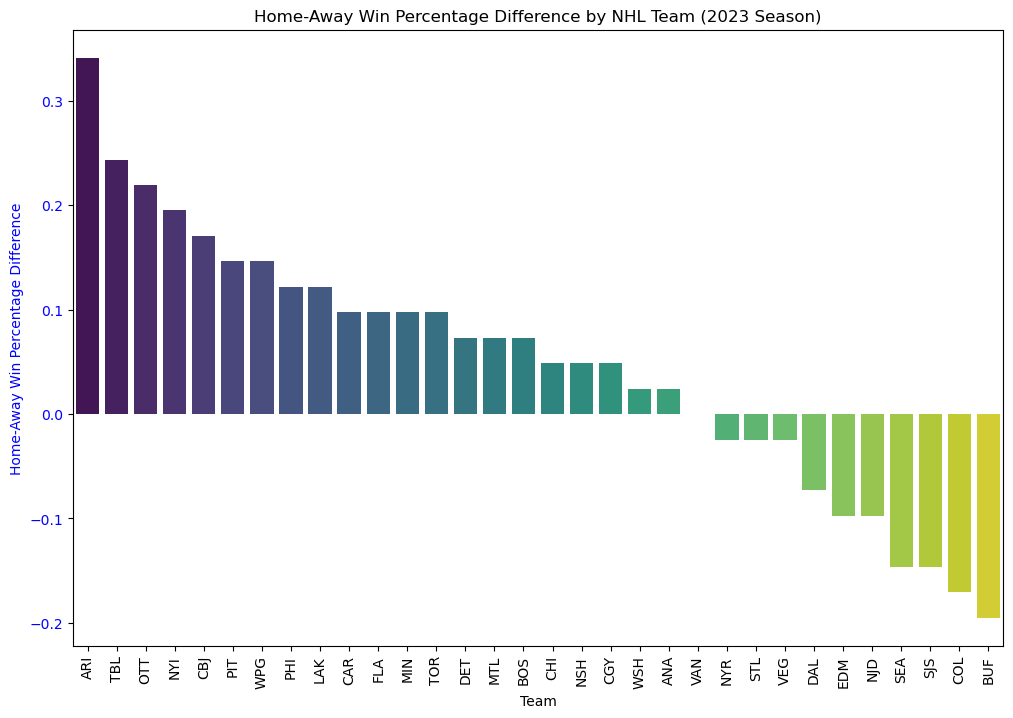

In [8]:
# Filter for home and away games
home_games = nhl_2023[nhl_2023['Home/Away'] == 'Y'].copy()
away_games = nhl_2023[nhl_2023['Home/Away'] == 'N'].copy()

# Group by team and calculate the home win percentage
home_win_percentage = home_games.groupby('Team')['W/L'].value_counts().unstack()
home_win_percentage['Win Percentage'] = (home_win_percentage['W']) / (home_win_percentage['W'] + home_win_percentage['L'])

# Group by team and calculate the away win percentage
away_win_percentage = away_games.groupby('Team')['W/L'].value_counts().unstack()
away_win_percentage['Win Percentage'] = (away_win_percentage['W']) / (away_win_percentage['W'] + away_win_percentage['L'])

# Calculate the difference between home and away win percentages
win_percentage_diff = home_win_percentage['Win Percentage'] - away_win_percentage['Win Percentage']

# Merge win percentage difference and average stadium fill into one DataFrame
team_stats = pd.DataFrame({
    'Win Percentage Diff': win_percentage_diff
})

# Sort the DataFrame by win percentage difference in descending order
team_stats = team_stats.sort_values(by='Win Percentage Diff', ascending=False)

# Create a subplot for both win percentage difference and average stadium fill
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the win percentage difference
sns.barplot(x=team_stats.index, y=team_stats['Win Percentage Diff'], palette='viridis', ax=ax1)
ax1.set_xlabel('Team')
ax1.set_ylabel('Home-Away Win Percentage Difference', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Suppress warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.title("Home-Away Win Percentage Difference by NHL Team (2023 Season)")
plt.show()

In [10]:
nhl_city_elevations = {
    'ANA': 92,   # Anaheim Ducks
    'ARI': 1086, # Arizona Coyotes
    'BOS': 141,  # Boston Bruins
    'BUF': 564,  # Buffalo Sabres
    'CGY': 3428, # Calgary Flames
    'CAR': 315,  # Carolina Hurricanes
    'CHI': 594,  # Chicago Blackhawks
    'COL': 5280, # Colorado Avalanche
    'CBJ': 902,  # Columbus Blue Jackets
    'DAL': 430,  # Dallas Stars
    'DET': 617,  # Detroit Red Wings
    'EDM': 2430, # Edmonton Oilers
    'FLA': 9,    # Florida Panthers
    'LAK': 305,  # Los Angeles Kings
    'MIN': 833,  # Minnesota Wild
    'MTL': 164,  # Montreal Canadiens
    'NSH': 597,  # Nashville Predators
    'NJD': 33,   # New Jersey Devils
    'NYI': 33,   # New York Islanders
    'NYR': 33,   # New York Rangers
    'OTT': 154,  # Ottawa Senators
    'PHI': 39,   # Philadelphia Flyers
    'PIT': 1223, # Pittsburgh Penguins
    'SJS': 85,   # San Jose Sharks
    'SEA': 174,  # Seattle Kraken
    'STL': 466,  # St. Louis Blues
    'TBL': 10,   # Tampa Bay Lightning
    'TOR': 243,  # Toronto Maple Leafs
    'VAN': 0,    # Vancouver Canucks
    'VGK': 2000, # Vegas Golden Knights
    'WAS': 12,   # Washington Capitals
    'WPG': 774   # Winnipeg Jets
}

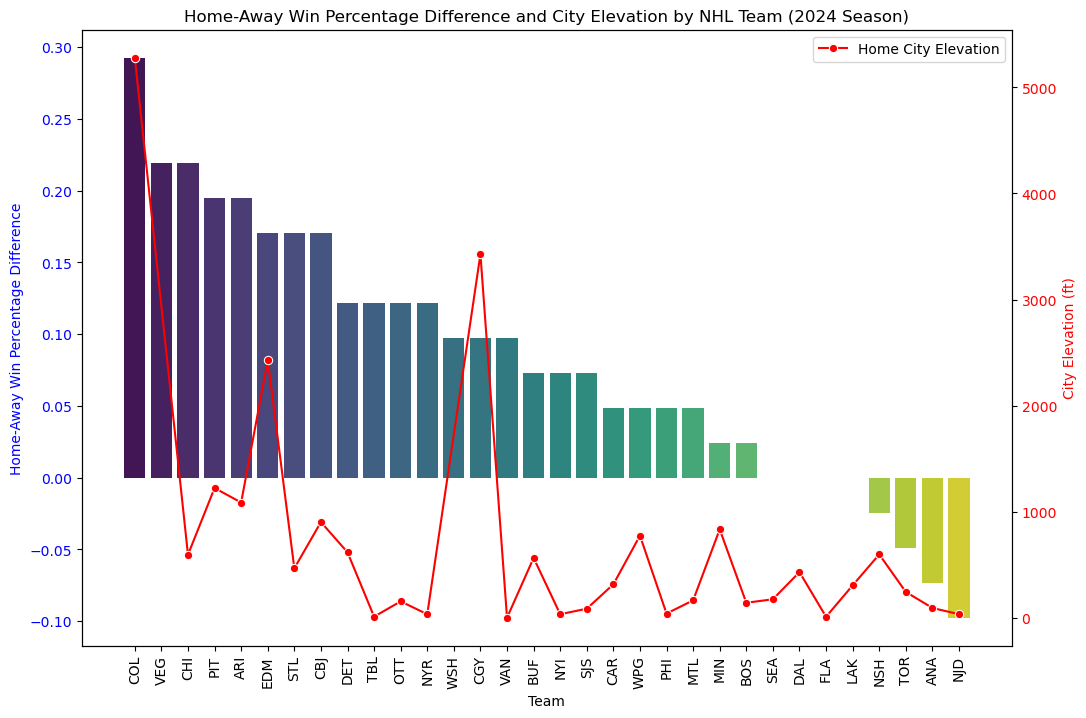

In [11]:
# Filter for home and away games
home_games = nhl_2024[nhl_2024['Home/Away'] == 'Y'].copy()
away_games = nhl_2024[nhl_2024['Home/Away'] == 'N'].copy()

# Add city elevation to the DataFrame for both home and away games, make numeric
home_games['City Elevation'] = pd.to_numeric(home_games['Team'].map(nhl_city_elevations))

# Group by team and calculate the home win percentage
home_win_percentage = home_games.groupby('Team')['W/L'].value_counts().unstack()
home_win_percentage['Win Percentage'] = (home_win_percentage['W']) / (home_win_percentage['W'] + home_win_percentage['L'])

# Group by team and calculate the away win percentage
away_win_percentage = away_games.groupby('Team')['W/L'].value_counts().unstack()
away_win_percentage['Win Percentage'] = (away_win_percentage['W']) / (away_win_percentage['W'] + away_win_percentage['L'])

# Calculate the difference between home and away win percentages
win_percentage_diff = home_win_percentage['Win Percentage'] - away_win_percentage['Win Percentage']

# Merge win percentage difference and average city elevation into one DataFrame
team_stats = pd.DataFrame({
    'Win Percentage Diff': win_percentage_diff,
    'City Elevation': home_games.groupby('Team')['City Elevation'].first()
})

# Sort the DataFrame by win percentage difference in descending order
team_stats = team_stats.sort_values(by='Win Percentage Diff', ascending=False)

# Create a subplot for both win percentage difference and average city elevation
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the win percentage difference
sns.barplot(x=team_stats.index, y=team_stats['Win Percentage Diff'], palette='viridis', ax=ax1)
ax1.set_xlabel('Team')
ax1.set_ylabel('Home-Away Win Percentage Difference', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Create a secondary y-axis for the average city elevation for home and away games
ax2 = ax1.twinx()  # allows for two y-axes to the same x axis
sns.lineplot(x=team_stats.index, y=team_stats['City Elevation'], marker='o', color='red', ax=ax2, label='Home City Elevation')
ax2.set_ylabel('City Elevation (ft)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a legend
ax2.legend(loc='upper right')

# Suppress warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.title("Home-Away Win Percentage Difference and City Elevation by NHL Team (2024 Season)")
plt.show()

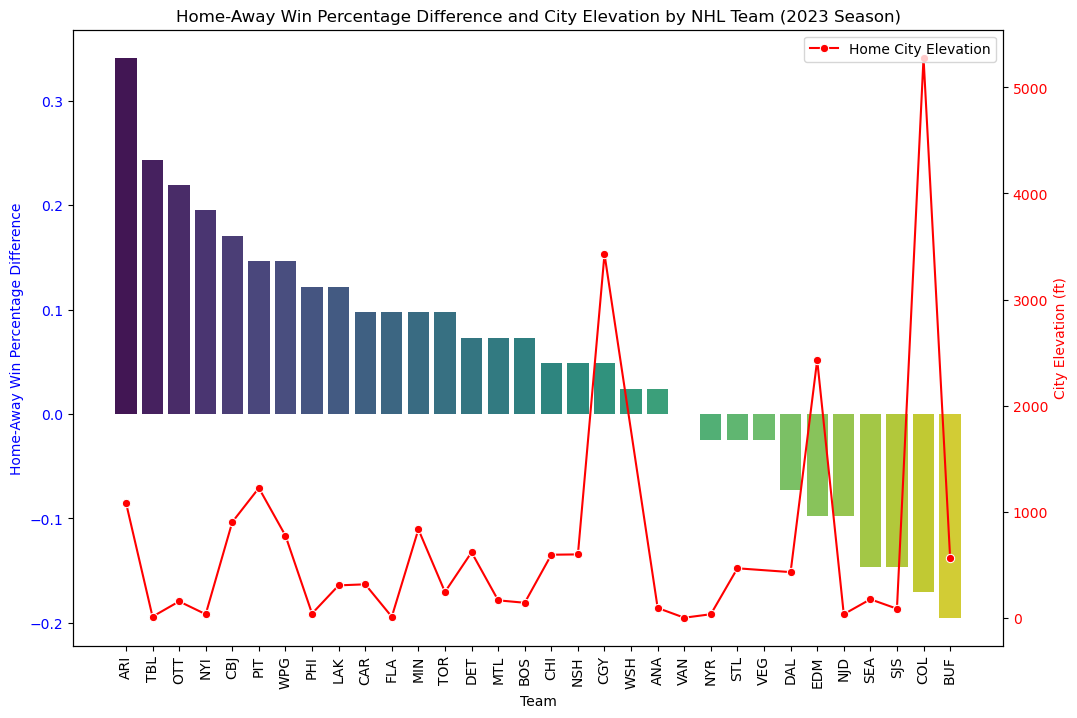

In [12]:
# Filter for home and away games
home_games = nhl_2023[nhl_2023['Home/Away'] == 'Y'].copy()
away_games = nhl_2023[nhl_2023['Home/Away'] == 'N'].copy()

# Add city elevation to the DataFrame for both home and away games, make numeric
home_games['City Elevation'] = pd.to_numeric(home_games['Team'].map(nhl_city_elevations))

# Group by team and calculate the home win percentage
home_win_percentage = home_games.groupby('Team')['W/L'].value_counts().unstack()
home_win_percentage['Win Percentage'] = (home_win_percentage['W']) / (home_win_percentage['W'] + home_win_percentage['L'])

# Group by team and calculate the away win percentage
away_win_percentage = away_games.groupby('Team')['W/L'].value_counts().unstack()
away_win_percentage['Win Percentage'] = (away_win_percentage['W']) / (away_win_percentage['W'] + away_win_percentage['L'])

# Calculate the difference between home and away win percentages
win_percentage_diff = home_win_percentage['Win Percentage'] - away_win_percentage['Win Percentage']

# Merge win percentage difference and average city elevation into one DataFrame
team_stats = pd.DataFrame({
    'Win Percentage Diff': win_percentage_diff,
    'City Elevation': home_games.groupby('Team')['City Elevation'].first()
})

# Sort the DataFrame by win percentage difference in descending order
team_stats = team_stats.sort_values(by='Win Percentage Diff', ascending=False)

# Create a subplot for both win percentage difference and average city elevation
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the win percentage difference
sns.barplot(x=team_stats.index, y=team_stats['Win Percentage Diff'], palette='viridis', ax=ax1)
ax1.set_xlabel('Team')
ax1.set_ylabel('Home-Away Win Percentage Difference', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
plt.xticks(rotation=90)

# Create a secondary y-axis for the average city elevation for home and away games
ax2 = ax1.twinx()  # allows for two y-axes to the same x axis
sns.lineplot(x=team_stats.index, y=team_stats['City Elevation'], marker='o', color='red', ax=ax2, label='Home City Elevation')
ax2.set_ylabel('City Elevation (ft)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a legend
ax2.legend(loc='upper right')

# Suppress warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.title("Home-Away Win Percentage Difference and City Elevation by NHL Team (2023 Season)")
plt.show()